<a href="https://colab.research.google.com/github/rkaur050/linear-regression/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model Representation for **Linear Regression** in one variable

### **Problem**: Housing Price Prediction using Simple Linear Regression


*   We have data for the size of houses (in 1000 sqft) and their corresponding prices (in 1000s of dollars).
*   The goal is to use linear regression to find a relationship between the size of the house and its price, allowing us to predict the price of a house given its size.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x_train=np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_train=np.array([250, 300, 480,  430,   630, 730])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2. 3. 4. 5. 6.]
y_train=[250 300 480 430 630 730]


In [ ]:
m=x_train.shape[0]
print(f"No. of training examples:{m}")

No. of training examples:6


### Plotting of data

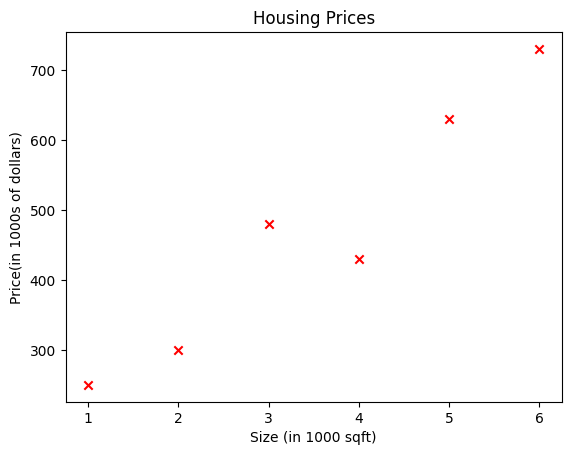

In [ ]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title('Housing Prices')
plt.ylabel('Price(in 1000s of dollars)')
plt.xlabel('Size (in 1000 sqft)')
plt.show()

### Applying model function
*   The model establishes a relationship between features and targets
*   Here, house Size is feature and  price is the target
*   The model has two parameters 𝑤 and 𝑏 whose values are 'fit' using training data.
*   once trained, the model is used to make predictionso on new unseen data.

In [ ]:
w_init=0
b_init=0
print(f"Parameters (w,b):{w_init,b_init}")

Parameters (w,b):(0, 0)


In [ ]:
def compute_model_output(x,w,b):
  m=x_train.shape[0]
  f_wb=np.zeros(m)
  for i in range(m):
    f_wb[i]=w*x[i]+b
  return f_wb

Text(0.5, 0, 'Size (in 1000 sqft)')

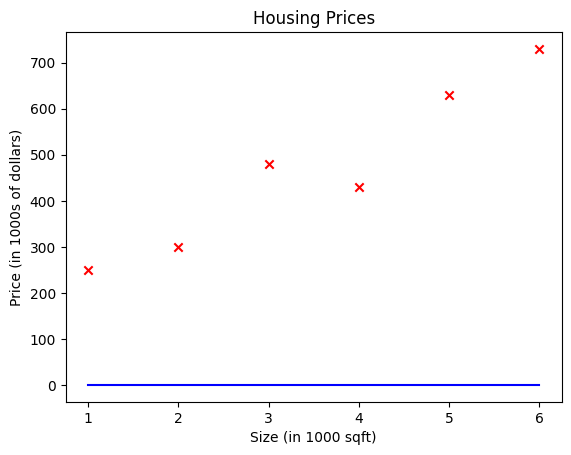

In [ ]:
f_wb=compute_model_output(x_train,w_init,b_init)
plt.plot(x_train,f_wb,c='b',label='Predictec Values')
plt.scatter(x_train,y_train,c='r',marker='x',label='Actual Values')
plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (in 1000 sqft)')

### Setting up the Cost Function

*   The cost equation provides a measure of how well the predictions match training data.




In [ ]:
def compute_cost(y_train,f_wb,w,b,m):
  cost_sum=0
  for i in range(m):
    error=f_wb[i]-y_train[i]
    squared_error=error**2
    cost_sum+=squared_error
  total_cost=(1/(2*m))*cost_sum
  return total_cost

In [ ]:
cost=compute_cost(y_train,f_wb,w_init,b_init,m);

In [ ]:
print(cost)

124800.0


### Implementing Gradient Descent

*   Process to optimize the parameters to minimize cost function

In [ ]:
def compute_gradient(x,y,f_wb,w,b,m):
  dj_dw=0
  dj_db=0
  for i in range(m):
    dj_dw_i=(f_wb[i]-y[i])*x[i]
    dj_db_i=(f_wb[i]-y[i])
    dj_dw+=dj_dw_i
    dj_db+=dj_db_i
  dj_dw/=m
  dj_db/=m
  return dj_dw,dj_db


In [ ]:
def gradient_descent(x_train,y_train,w_init,b_init,alpha,num_itrs):
  w=w_init
  b=b_init
  m=x_train.shape[0]
  cost_history=[]
  for i in range(num_itrs):
    f_wb=compute_model_output(x_train,w,b)
    cost_before=compute_cost(y_train,f_wb,w,b,m)
    dj_dw,dj_db=compute_gradient(x_train,y_train,f_wb,w,b,m)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    f_wb=compute_model_output(x_train,w,b)
    cost_after=compute_cost(y_train,f_wb,w,b,m)
    cost_history.append(cost_after)

    if i%100==0:
        print(f"For Iteration {i}:\n Cost before update:{cost_before}\n Cost after update:{cost_after}\n w:{w} b:{b} \n")
  return w,b,cost_history

In [ ]:
alpha=0.11
num_itrs=1000
w_final,b_final,cost_history=gradient_descent(x_train,y_train,w_init,b_init,alpha,num_itrs)

For Iteration 0:
 Cost before update:124800.0
 Cost after update:72640.65731481483
 w:211.56666666666666 b:51.7 

For Iteration 100:
 Cost before update:1088.9117860563554
 Cost after update:1088.1412896392753
 w:98.67777221104676 b:122.08952648510167 

For Iteration 200:
 Cost before update:1069.8598362449657
 Cost after update:1069.8464822271144
 w:95.85632851556946 b:134.1686870008899 

For Iteration 300:
 Cost before update:1069.5296334403565
 Cost after update:1069.5294019924363
 w:95.4848856232709 b:135.7589077541385 

For Iteration 400:
 Cost before update:1069.523910462222
 Cost after update:1069.5239064508348
 w:95.43598518890656 b:135.9682602203758 

For Iteration 500:
 Cost before update:1069.5238112732443
 Cost after update:1069.5238112037202
 w:95.42954744967233 b:135.99582145992713 

For Iteration 600:
 Cost before update:1069.5238095541317
 Cost after update:1069.5238095529244
 w:95.4286999216905 b:135.99944989545145 

For Iteration 700:
 Cost before update:1069.52380952

In [ ]:
print(f"Final parameters: w = {w_final}, b = {b_final}")

Final parameters: w = 95.42857146795983, b = 135.99999983137045


### Visualization of Fitted Line

Text(0.5, 0, 'Size (in 1000 sqft)')

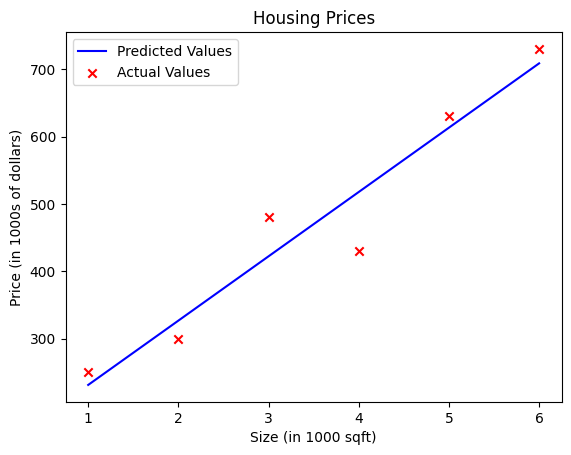

In [ ]:
f_wb=compute_model_output(x_train,w_final,b_final)
plt.plot(x_train,f_wb,c='b',label='Predicted Values')
plt.scatter(x_train,y_train,c='r',marker='x',label='Actual Values')
plt.legend()
plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (in 1000 sqft)')